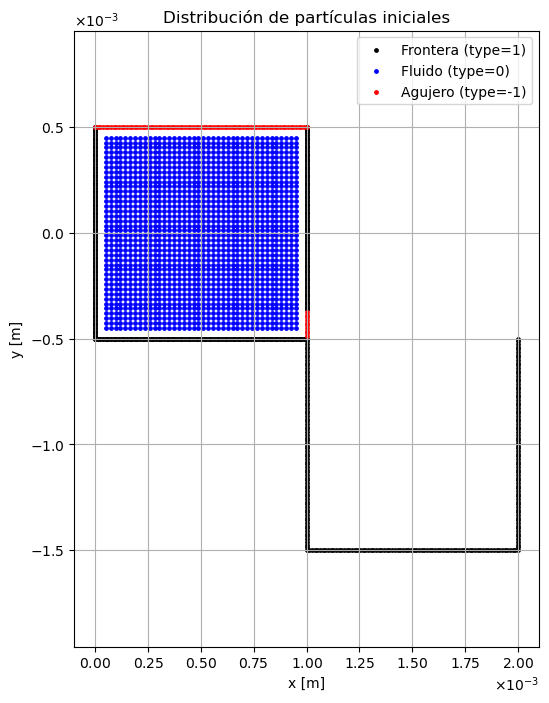

In [5]:
from pathlib import Path
from utils.plot_ics import plot_ics

PROJECT_ROOT = Path().resolve().parent
vaciado = PROJECT_ROOT / "Output" / "init_cond" / "firstVaciadoIC.txt"

plot_ics(vaciado)

In [ ]:
from utils.create_simJSON import create_simulation_config

create_simulation_config(
    experiment_name="vaciado_estabilizacion4k",
    input_file="Output/init_cond/firstVaciadoIC.txt",
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 4000,
    project_root=PROJECT_ROOT
)

✅ Archivo generado: Output/vaciado_estabilizacion4k/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado_estabilizacion4k/params.json')

In [1]:
from utils.run_sim import run_single_simulation
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
vaciado = PROJECT_ROOT / "Output" / "init_cond" / "firstVaciadoIC.txt"

run_single_simulation(
    experiment_dir=PROJECT_ROOT / "Output" / "vaciado_estabilizacion4k",
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=6300
)


🚀 Ejecutando simulación: vaciado_estabilizacion4k

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado_estabilizacion4k/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 2389 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 2390 partículas desde el archivo Output/init_cond/firstVaciadoIC.txt

[particleSummary] Número total de partículas: 2390
Fluido: 1600, Ancho: 0.0009, Altura: 0.0009
Frontera: 790, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/tests/kernel_test.output
[findNeighborsQuadTree] Buscando vecinos (Quadtree)...
Total partículas: 2390

In [3]:
from utils.create_gnuplot import generar_script_gnuplot

BASE_ROOT = f"{PROJECT_ROOT}/Output/vaciado_estabilizacion4k/Output/state_0000.txt"
print(BASE_ROOT)

/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado_estabilizacion4k/Output/state_0000.txt


In [ ]:
generar_script_gnuplot(BASE_ROOT, lim=39, retardo=0.1, nombre_salida="vaciado_est4k.gp")

✅ Script Gnuplot generado correctamente: vaciado_est4k.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–230 (231 partículas)
  Tipo -1: líneas 231–321 (91 partículas)
  Tipo 1: líneas 322–789 (468 partículas)
  Tipo 0: líneas 790–2389 (1600 partículas)
